In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
import PIL.Image as Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-04-29 04:41:48.297553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 04:41:48.297651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 04:41:48.489495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
vgg_model = load_model('/kaggle/input/models/vgg16.h5')
res_model = load_model('/kaggle/input/models/ResNet.h5')

In [7]:
test = test_datagen.flow_from_directory(directory='/kaggle/input/fer2013/test',
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  shuffle=False)

Found 7178 images belonging to 7 classes.


In [9]:
vgg_predictions = vgg_model.predict(test, verbose=1)
res_predictions = res_model.predict(test, verbose=1)
avg_predictions = (vgg_predictions + res_predictions) / 2
predicted_labels = np.argmax(avg_predictions, axis=1)
true_labels = test.classes
conf_matrix = confusion_matrix(true_labels, predicted_labels)

113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 255ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step


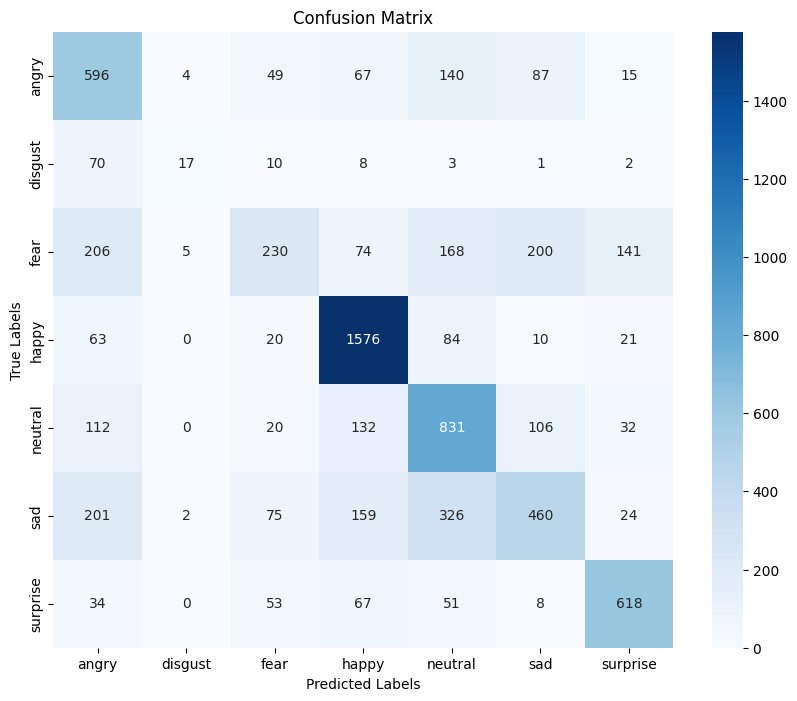

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(),
            yticklabels=test.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

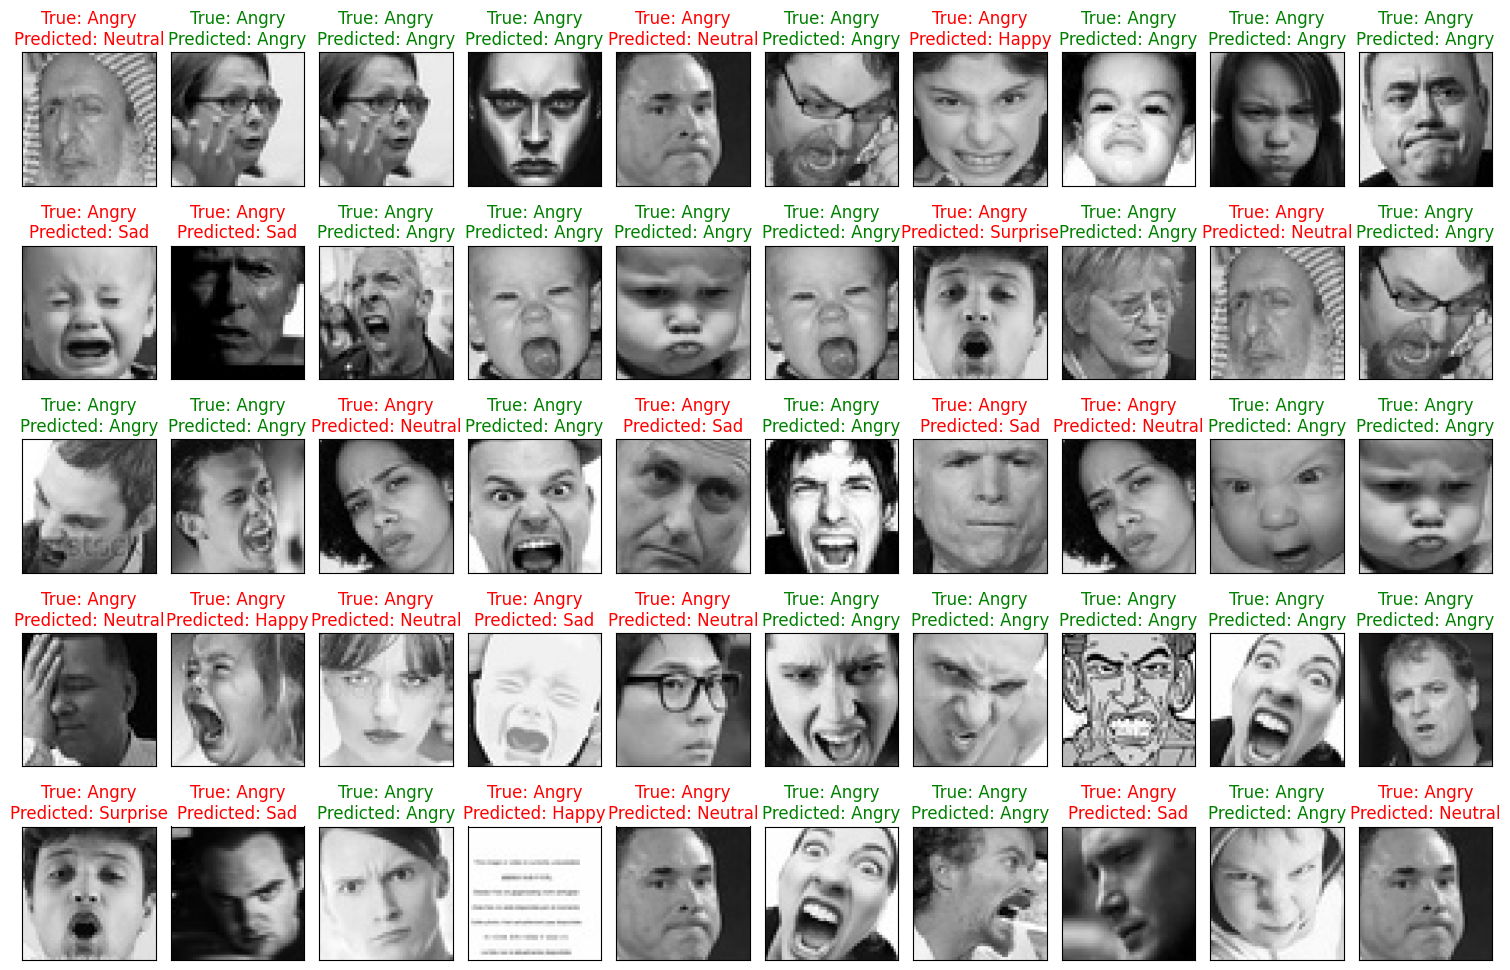

In [18]:
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
batch_size = 64
Random_Img_Indices = np.random.randint(0, len(test), 50)
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 10),
                         subplot_kw={'xticks': [], 'yticks': []})


for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img_Index = Random_Img_Indices[i]
    Random_Batch_Index = Random_Img_Index // batch_size
    Img_Index_In_Batch = Random_Img_Index % batch_size 
    Random_Img = test[Random_Batch_Index][0][Img_Index_In_Batch]
    Random_Img_Label = np.argmax(test[Random_Batch_Index][1][Img_Index_In_Batch], axis=0)

    # Making predictions using both models
    vgg_prediction = vgg_model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0)
    res_prediction = res_model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0)
    avg_prediction = (vgg_prediction + res_prediction) / 2
    Model_Prediction = np.argmax(avg_prediction, axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')
    color = "green" if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()